[INFO] loading CIFAR-10 data...
[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 23s 469us/step - loss: 1.8065 - acc: 0.3665 - val_loss: 1.6318 - val_acc: 0.4321
Epoch 2/40
50000/50000 [==============================] - 24s 477us/step - loss: 1.5524 - acc: 0.4574 - val_loss: 1.5979 - val_acc: 0.4421
Epoch 3/40
50000/50000 [==============================] - 23s 461us/step - loss: 1.4334 - acc: 0.4975 - val_loss: 1.4117 - val_acc: 0.5060
Epoch 4/40
50000/50000 [==============================] - 22s 442us/step - loss: 1.3545 - acc: 0.5265 - val_loss: 1.3760 - val_acc: 0.5058
Epoch 5/40
50000/50000 [==============================] - 22s 445us/step - loss: 1.2887 - acc: 0.5491 - val_loss: 1.2867 - val_acc: 0.5451
Epoch 6/40
50000/50000 [==============================] - 23s 455us/step - loss: 1.2405 - acc: 0.5650 - val_loss: 1.3715 - val_acc: 0.5027
Epoch 7/40
50000/50000 [=======

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexゴシック'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


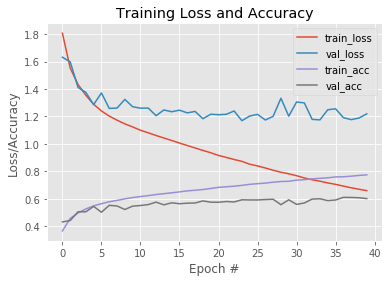

In [4]:
# Make notebook matplotlib plot inline
%matplotlib inline

# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from shallownet import ShallowNet
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

# save the network to disk
print("[INFO] serializing network...")
model.save("shallownet_weights.hdf5")

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
plt.savefig("shallownet_cifar10")